### graph visualization

In [1]:
import imageio
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import animation
from PIL import Image

In [2]:
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import kneighbors_graph

In [3]:
csv_fname = "hMSC_Control 2.csv"
avi_fname = "hMSC_Control 2.avi"

In [4]:
trajectry = pd.read_csv(csv_fname)
trajectry.columns = ["track", "slice", "x", "y", "distance", "velocity", "pixel_val"]

In [5]:
trajectry.head()

,track,slice,x,y,distance,velocity,pixel_val
0,1,1,170,52,-1.000,-1.000,-12976128
1,1,2,168,53,1.677,0.056,-12255232
2,1,3,160,48,7.075,0.236,-11337728
3,1,4,159,48,0.750,0.025,-10485760
4,1,5,157,46,2.121,0.071,-10289152


In [6]:
trajectry["track"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

In [7]:
trajectry["slice"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

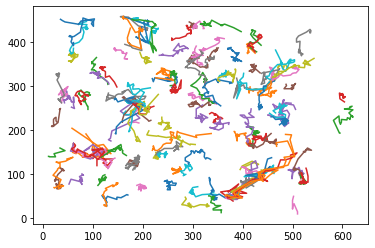

In [8]:
ims = []
for i in range(1, 135):
    im = plt.plot(
        trajectry.loc[trajectry["track"] == i, "x"],
        trajectry.loc[trajectry["track"] == i, "y"],
    )
    ims.append(im)

In [9]:
# k-nearest neighbor graph
def make_knn_graph(pos, k=5):
    A = kneighbors_graph(pos, 5).toarray()
    G = nx.from_numpy_matrix(A)
    return G


# epsilon-threshold proximity graph
def make_eps_neighborhood_graph(pos, eps):
    A = (squareform(pdist(pos)) < eps).astype(int)
    G = nx.from_numpy_matrix(A)
    return G

In [10]:
frame_i = 0
pos = trajectry.loc[trajectry["slice"] == frame_i + 1, ["x", "y"]].values

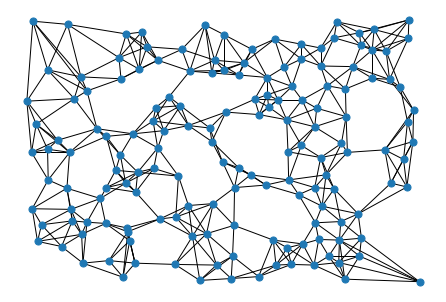

In [11]:
G = make_knn_graph(pos, k=5)
nx.draw(G, pos, node_size=50)

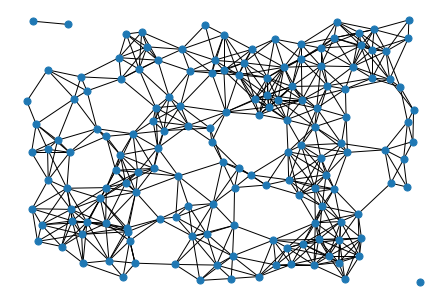

In [12]:
G = make_eps_neighborhood_graph(pos, eps=70)
nx.draw(G, pos, node_size=50)

(-3.400000000000002, 643.4, 24.549999999999997, 474.45)

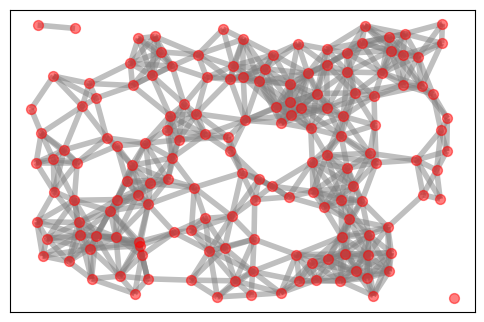

In [13]:
fig, ax = plt.subplots(dpi=100)

G = make_eps_neighborhood_graph(pos, eps=70)

nx.draw(G, pos, node_size=50, ax=ax,
       node_color='red', edge_color='gray', width=4, alpha=0.5)
ax.axis('on')

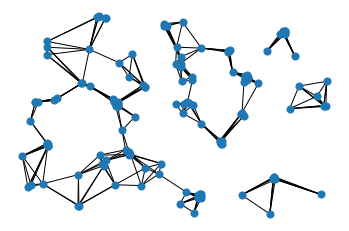

In [14]:
fig = plt.figure()


def update(i):
    plt.cla()
    pos = trajectry.loc[trajectry["slice"] == i + 1, ["x", "y"]].values
    G = make_knn_graph(pos, k=5)
    nx.draw(G, pos, node_size=50)


anim = animation.FuncAnimation(fig, update, interval=100, frames=25)
anim.save("anim.gif")
anim.save("anim.mp4")

In [15]:
vid = imageio.get_reader(avi_fname, "ffmpeg")
img_seq = [image for image in vid.iter_data()]

In [16]:
len(img_seq)  # num of frames

25

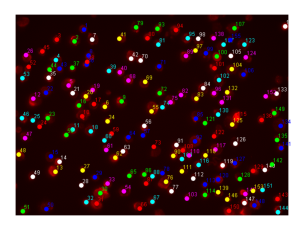

In [17]:
labeloff = {'labelbottom': False,
            'labelleft': False,
            'labelright': False,
             'labeltop':  False}

fig, ax = plt.subplots()
ax.imshow(img_seq[0])
ax.tick_params(**labeloff)
ax.set_axis_off()

In [18]:
def save_gifanim(np_im_list, outfile, dur=300):
    im_list = []
    for x in np_im_list:
        im = Image.fromarray(x).convert("P")
        im_list.append(im)
    im_list[0].save(
        outfile, save_all=True, append_images=im_list[1:], optimize=False, duration=dur
    )

In [19]:
img_frames = []
for i, im in enumerate(img_seq):
    pos = trajectry.loc[trajectry["slice"] == i + 1, ["x", "y"]].values
    A = kneighbors_graph(pos, 5).toarray()
    G = nx.from_numpy_matrix(A)

    fig, ax = plt.subplots()
    nx.draw(
        G, pos, ax=ax, node_size=50, node_color="yellow", edge_color="white", alpha=0.3
    )
    ax.imshow(im)
    ax.tick_params(**labeloff)
    ax.set_axis_off()
    fig.tight_layout()
    fig.canvas.draw()
    x = np.asarray(fig.canvas.buffer_rgba())
    img_frames.append(x)
    plt.close()

In [20]:
save_gifanim(img_frames, "test_anim.gif")